In [2]:
import pandas as pd
import os
import glob
import numpy as np

In [3]:
df = pd.read_csv("../DataBombardier/2sec/flight_test_11.csv")

In [4]:
df.head(100)

,Description,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
0,Unit,seconds,lb/min,LBSM,deg C,deg C,ft,Ma,Deg C,DegC,LBSM,LBSM
1,Type,NaN,NaN,INPUT,INPUT,INPUT,INPUT,INPUT,NaN,TARGET,NaN,NaN
2,NaN,26992,6.335169,19.96412,4.708986,-3.440178,2187.0,0.0,-1.828477,0.4315051088240862,5.783683,16.116082
3,NaN,26994,6.31404,19.96412,4.795795,-3.440178,2187.0,0.004247,-1.838656,0.49935823893082,5.754859,16.118601
4,NaN,26996,6.305943,19.96412,4.882604,-3.440178,2188.0,0.0,-1.808119,0.5502468711894677,5.700329,16.087003
5,NaN,26998,6.308115,19.96412,4.969412,-3.440178,2188.0,0.0,-1.791154,0.5400694225254874,5.694643,16.038739
6,NaN,27000,6.322136,19.96412,5.056221,-3.429327,2188.0,0.0,-1.794547,0.563817497210815,5.743289,16.011841
7,NaN,27002,6.334577,19.964436,5.316647,-3.429327,2188.0,0.004999,-1.760616,0.621492484184194,5.824154,15.999954
8,NaN,27004,6.348203,19.96412,5.490264,-3.429327,2188.0,0.002375,-1.764009,0.6757742938002087,5.85732,15.96406
9,NaN,27006,6.34998,19.96412,5.663882,-3.418475,2188.0,0.0031,-1.777581,0.699523062954909,5.851593,15.943845


In [5]:
df = df.drop('Description', axis=1)

In [6]:
df = df.set_index('TIME OF DAY IN SECONDS')

In [7]:
data_units = df.iloc[0]
data_units.name = 'Unit'
data_units

1st Cooling Sys MASS FLOW      lb/min
2nd Cooling Sys MASS FLOW        LBSM
ACS_Zone_Actual_Temperature     deg C
Outside Air Temperature_OAT     deg C
Pressure Altitude                  ft
Mach                               Ma
1st AVIONICS BAY BULK TEMP      Deg C
2nd AVIONICS BAY BULK TEMP       DegC
1st Underfloor flow              LBSM
2nd Underfloor flow              LBSM
Name: Unit, dtype: object

In [8]:
data_label_type = df.iloc[1]
data_label_type.name = 'Type'
data_label_type

1st Cooling Sys MASS FLOW         NaN
2nd Cooling Sys MASS FLOW       INPUT
ACS_Zone_Actual_Temperature     INPUT
Outside Air Temperature_OAT     INPUT
Pressure Altitude               INPUT
Mach                            INPUT
1st AVIONICS BAY BULK TEMP        NaN
2nd AVIONICS BAY BULK TEMP     TARGET
1st Underfloor flow               NaN
2nd Underfloor flow               NaN
Name: Type, dtype: object

In [9]:
df = df.iloc[3:]
df.head()

,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
TIME OF DAY IN SECONDS,,,,,,,,,,
26994,6.31404,19.96412,4.795795,-3.440178,2187.0,0.004247,-1.838656,0.49935823893082,5.754859,16.118601
26996,6.305943,19.96412,4.882604,-3.440178,2188.0,0.0,-1.808119,0.5502468711894677,5.700329,16.087003
26998,6.308115,19.96412,4.969412,-3.440178,2188.0,0.0,-1.791154,0.5400694225254874,5.694643,16.038739
27000,6.322136,19.96412,5.056221,-3.429327,2188.0,0.0,-1.794547,0.563817497210815,5.743289,16.011841
27002,6.334577,19.964436,5.316647,-3.429327,2188.0,0.004999,-1.760616,0.621492484184194,5.824154,15.999954


In [10]:
df = df.reset_index()
df.head()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
0,26994,6.31404,19.96412,4.795795,-3.440178,2187.0,0.004247,-1.838656,0.49935823893082,5.754859,16.118601
1,26996,6.305943,19.96412,4.882604,-3.440178,2188.0,0.0,-1.808119,0.5502468711894677,5.700329,16.087003
2,26998,6.308115,19.96412,4.969412,-3.440178,2188.0,0.0,-1.791154,0.5400694225254874,5.694643,16.038739
3,27000,6.322136,19.96412,5.056221,-3.429327,2188.0,0.0,-1.794547,0.563817497210815,5.743289,16.011841
4,27002,6.334577,19.964436,5.316647,-3.429327,2188.0,0.004999,-1.760616,0.621492484184194,5.824154,15.999954


In [11]:
df.describe()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
count,19454,19454,19454,19454,19454,19454,19454,19454,19454,19454,19454
unique,19454,5642,6076,232,2262,1624,4875,3866,3829,15716,16326
top,40980,5.299426,19.563251,25.282642,-2.919326,2138.0,0.008627,17.511991,23.050150363157933,4.558122,13.052099
freq,1,2723,2693,3796,7176,2701,2713,2698,2694,2690,2690


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19454 entries, 0 to 19453
Data columns (total 11 columns):
TIME OF DAY IN SECONDS         19454 non-null object
1st Cooling Sys MASS FLOW      19454 non-null object
2nd Cooling Sys MASS FLOW      19454 non-null object
ACS_Zone_Actual_Temperature    19454 non-null object
Outside Air Temperature_OAT    19454 non-null object
Pressure Altitude              19454 non-null object
Mach                           19454 non-null object
1st AVIONICS BAY BULK TEMP     19454 non-null object
2nd AVIONICS BAY BULK TEMP     19454 non-null object
1st Underfloor flow            19454 non-null object
2nd Underfloor flow            19454 non-null object
dtypes: object(11)
memory usage: 1.6+ MB


In [13]:
nparray = df.to_numpy()
nparray

array([['26994', '6.31404', '19.96412', ..., '0.49935823893082',
        '5.754859', '16.118601'],
       ['26996', '6.305943', '19.96412', ..., '0.5502468711894677',
        '5.700329', '16.087003'],
       ['26998', '6.308115', '19.96412', ..., '0.5400694225254874',
        '5.694643', '16.038739'],
       ...,
       ['65896', '0.002424', '0.081831', ..., '21.03832189637557',
        '4.455305', '12.814472'],
       ['65898', '0.002226', '0.081831', ..., '21.007788855914256',
        '4.441722', '12.805863'],
       ['65900', '0.002226', '0.081831', ..., '21.021359481935605',
        '4.431495', '12.796819']], dtype=object)

In [14]:
csv_stringLoader = "../DataBombardier/2sec/flight_test_*.csv"

In [15]:
def sortKeyFunc(s):
    return int(os.path.basename(s)[12:-4])

In [16]:
def bomb_csv_to_df(csv_stringLoader):
    list_df = []
    list_data_units = []
    list_data_label_type = []
    allFiles = sorted(glob.glob(csv_stringLoader), key=sortKeyFunc)

    for files in allFiles:
        print('Loading:{}'.format(files))
        df = pd.read_csv(files)
        df = df.drop('Description', axis=1)
        df = df.set_index('TIME OF DAY IN SECONDS')

        data_units = df.iloc[0]
        data_units.name = 'Unit'

        data_label_type = df.iloc[1]
        data_label_type.name = 'Type'

        df = df.iloc[3:]
        df = df.apply(pd.to_numeric)

        list_df.append(df)
        list_data_units.append(data_units)
        list_data_label_type.append(data_label_type)
        
    return list_df, list_data_units, list_data_label_type

In [17]:
list_df, list_data_units, list_data_label_type = bomb_csv_to_df(csv_stringLoader)

Loading:../DataBombardier/2sec\flight_test_1.csv
Loading:../DataBombardier/2sec\flight_test_3.csv
Loading:../DataBombardier/2sec\flight_test_4.csv
Loading:../DataBombardier/2sec\flight_test_5.csv
Loading:../DataBombardier/2sec\flight_test_6.csv
Loading:../DataBombardier/2sec\flight_test_7.csv
Loading:../DataBombardier/2sec\flight_test_8.csv
Loading:../DataBombardier/2sec\flight_test_9.csv
Loading:../DataBombardier/2sec\flight_test_10.csv
Loading:../DataBombardier/2sec\flight_test_11.csv


In [18]:
df = list_df[0]

In [19]:
df.head()

,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
TIME OF DAY IN SECONDS,,,,,,,,,,
17902,5.119134,17.831211,29.709884,26.150728,2365.0,0.008851,35.240755,33.767461,8.652254,15.141995
17904,5.129402,17.793621,29.709884,26.172430,2364.0,0.008205,35.250933,33.787814,8.712825,15.125606
17906,5.144212,17.751606,29.623075,26.194133,2365.0,0.008917,35.233968,33.770852,8.806761,15.103295
17908,5.146977,17.708962,29.623075,26.194133,2364.0,0.009194,35.244148,33.787814,8.886403,15.099780
17910,5.144015,17.684005,29.623075,26.183282,2364.0,0.005896,35.227183,33.791208,8.932443,15.097211


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9260 entries, 17902 to 36420
Data columns (total 10 columns):
1st Cooling Sys MASS FLOW      9260 non-null float64
2nd Cooling Sys MASS FLOW      9260 non-null float64
ACS_Zone_Actual_Temperature    9260 non-null float64
Outside Air Temperature_OAT    9260 non-null float64
Pressure Altitude              9260 non-null float64
Mach                           9260 non-null float64
1st AVIONICS BAY BULK TEMP     9260 non-null float64
2nd AVIONICS BAY BULK TEMP     9260 non-null float64
1st Underfloor flow            9260 non-null float64
2nd Underfloor flow            9260 non-null float64
dtypes: float64(10)
memory usage: 795.8+ KB


In [21]:
#Testing rescaling of data columns

In [22]:
desc = df.describe(include='all')
desc

,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
count,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000
mean,5.338515,18.229968,24.382175,-4.877405,16198.761231,0.515751,22.957897,24.117648,6.289382,11.149032
std,0.148002,0.781077,1.113369,16.132508,7642.479243,0.248429,5.264988,4.045628,1.281020,2.125628
min,4.038959,9.907043,22.331147,-18.555738,1699.000000,0.000000,16.836772,18.982390,0.226679,0.549607
25%,5.225769,17.893443,23.372851,-16.211903,12432.750000,0.480027,18.777605,20.799143,5.643670,10.072766
50%,5.312854,18.187381,24.588172,-11.828066,20897.000000,0.656255,21.403836,23.304597,5.732299,10.212747
75%,5.421316,18.543234,24.761790,3.222388,20902.000000,0.659237,24.939410,25.995799,5.910535,10.577323
max,6.243147,20.460071,29.709884,26.628176,20923.000000,0.668681,35.261114,33.797992,14.690238,24.117109


In [23]:
#List df to max array
def list_df_to_max_array(list_df):
    maxdflist = []
    for df in list_df:
        maxdflist.append(df.describe(include='all').loc[ "max", :].to_numpy())
        #print(df.describe(include='all').loc[ "max", :].to_numpy())
    for m in range(len(maxdflist)):
        #print(m)
        if m==0:
            maxarray = maxdflist[m]
        else:
            maxarray = np.maximum(maxarray, maxdflist[m])
    #print(maxarray)
    return maxarray

#list df to min array
def list_df_to_min_array(list_df):
    mindflist = []
    for df in list_df:
        mindflist.append(df.describe(include='all').loc[ "min", :].to_numpy())
        #print(df.describe(include='all').loc[ "max", :].to_numpy())
    for m in range(len(mindflist)):
        #print(m)
        if m==0:
            minarray = mindflist[m]
        else:
            minarray = np.minimum(minarray, mindflist[m])
    #print(minarray)
    return minarray

#max and min array to rescaling array (bigger values of both, column-wise)
def min_max_arrays_to_rescaling_array(minarray, maxarray):
    rescaling_array = np.maximum(np.absolute(minarray), maxarray)
    return rescaling_array

#to rescale columns of a single df from a rescaling array
def rescale_single_df(df, rescaling_array):
    rescaled_df = pd.DataFrame()
    for e, (columnName, columnData) in enumerate(df.iteritems()):
        #print(e)
        #print(columnName)
        #print(columnData)
        rescaled_df[columnName] = columnData/(rescaling_array[e]+1)
    return rescaled_df

#rescale a list of df, column-wise
def rescale_list_of_df(list_df):
    minarray = list_df_to_min_array(list_df)
    maxarray = list_df_to_max_array(list_df)
    rescaling_array = min_max_arrays_to_rescaling_array(minarray, maxarray)
    
    rescaled_list_df = []
    for df in list_df:
        rescaled_list_df.append(rescale_single_df(df, rescaling_array))
    return rescaled_list_df

In [24]:
minarray = list_df_to_min_array(list_df)
minarray

array([-1.52395000e-01,  1.27800000e-03,  4.79579500e+00, -3.70351340e+01,
        1.21200000e+03,  0.00000000e+00, -1.83865600e+00,  4.99358239e-01,
       -1.35757500e+00,  2.92575000e-01])

In [25]:
maxarray = list_df_to_max_array(list_df)
maxarray

array([1.20907030e+01, 2.04600710e+01, 2.97098840e+01, 3.99967110e+01,
       2.99560000e+04, 6.95564000e-01, 3.52611140e+01, 3.37979924e+01,
       1.92237140e+01, 2.84074330e+01])

In [26]:
rescaling_array = min_max_arrays_to_rescaling_array(minarray, maxarray)
rescaling_array

array([1.20907030e+01, 2.04600710e+01, 2.97098840e+01, 3.99967110e+01,
       2.99560000e+04, 6.95564000e-01, 3.52611140e+01, 3.37979924e+01,
       1.92237140e+01, 2.84074330e+01])

In [27]:
rescaled_df = rescale_single_df(list_df[0], rescaling_array)
rescaled_df.describe()

,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
count,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000
mean,0.407810,0.849483,0.793952,-0.118971,0.540734,0.304177,0.633127,0.693076,0.310990,0.379123
std,0.011306,0.036397,0.036254,0.393507,0.255115,0.146517,0.145197,0.116260,0.063342,0.072282
min,0.308536,0.461650,0.727165,-0.452615,0.056715,0.000000,0.464320,0.545502,0.011209,0.018689
25%,0.399197,0.833802,0.761086,-0.395444,0.415020,0.283107,0.517844,0.597711,0.279062,0.342524
50%,0.405849,0.847499,0.800660,-0.288513,0.697567,0.387042,0.590270,0.669711,0.283444,0.347285
75%,0.414135,0.864081,0.806313,0.078601,0.697733,0.388801,0.687773,0.747049,0.292258,0.359682
max,0.476915,0.953402,0.967437,0.649520,0.698434,0.394371,0.972422,0.971263,0.726387,0.820102


In [28]:
rescaled_list_df = rescale_list_of_df(list_df)
rescaled_list_df[0].describe()

,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
count,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000
mean,0.407810,0.849483,0.793952,-0.118971,0.540734,0.304177,0.633127,0.693076,0.310990,0.379123
std,0.011306,0.036397,0.036254,0.393507,0.255115,0.146517,0.145197,0.116260,0.063342,0.072282
min,0.308536,0.461650,0.727165,-0.452615,0.056715,0.000000,0.464320,0.545502,0.011209,0.018689
25%,0.399197,0.833802,0.761086,-0.395444,0.415020,0.283107,0.517844,0.597711,0.279062,0.342524
50%,0.405849,0.847499,0.800660,-0.288513,0.697567,0.387042,0.590270,0.669711,0.283444,0.347285
75%,0.414135,0.864081,0.806313,0.078601,0.697733,0.388801,0.687773,0.747049,0.292258,0.359682
max,0.476915,0.953402,0.967437,0.649520,0.698434,0.394371,0.972422,0.971263,0.726387,0.820102


In [29]:
#Trying to remove rows based on time index

In [30]:
def shrink_timesteps_with_strides(list_df, stride=1):
    shrinked_list_df = []
    for df in list_df:
        shrinked_list_df.append(df.iloc[::stride, :])
    return shrinked_list_df

In [31]:
shrinked_list_df = shrink_timesteps_with_strides(rescaled_list_df, stride=30)
shrinked_list_df[0]

,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
TIME OF DAY IN SECONDS,,,,,,,,,,
17902,0.391051,0.830902,0.967437,0.637874,0.078946,0.005220,0.971861,0.970385,0.427827,0.514904
17962,0.393661,0.835215,0.950477,0.638668,0.078913,0.004489,0.970083,0.966681,0.431103,0.514756
18022,0.393178,0.828399,0.941997,0.638138,0.078880,0.003477,0.967182,0.962001,0.438528,0.515273
18082,0.393148,0.834758,0.936343,0.637080,0.078913,0.004170,0.964094,0.957808,0.435215,0.514766
18142,0.394822,0.823836,0.925036,0.636550,0.078880,0.003539,0.961848,0.952154,0.424071,0.513395
18202,0.393585,0.832492,0.913729,0.635756,0.078880,0.003610,0.959135,0.948351,0.433435,0.515897
18262,0.394626,0.824970,0.902422,0.635227,0.078880,0.003586,0.956702,0.944062,0.428345,0.515747
18322,0.394596,0.830710,0.893942,0.635227,0.078913,0.005648,0.951836,0.942307,0.429383,0.514809
18382,0.394128,0.824543,0.891115,0.634698,0.078880,0.005205,0.950339,0.946207,0.429787,0.516023


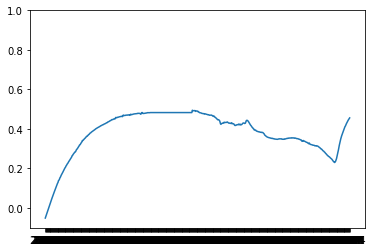

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylim(-0.1, 1)
plt.plot(shrinked_list_df[9]['1st AVIONICS BAY BULK TEMP'])
#shrinked_list_df[9]['1st AVIONICS BAY BULK TEMP']